In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [19]:
"""Data obtained from https://www.daggegevens.knmi.nl/klimatologie/uurgegevens, from location Hoek van Holland


begin_time = 21-9-2023 00:00:00
end_time   = 30-9-2023 00:00:00
"""

atm_data = pd.read_csv('atm_ps_data.txt', skiprows=8, skipinitialspace=True)

time_data = []

for i, ymd, h in zip(range(0, len(atm_data)), atm_data['YYYYMMDD'], atm_data['H']):
    
    if h < 10:
        h = '0' + str(h)
    else:
        h = str(h)
    
    if h == '24':
        h = '00'
        ymd += 1
    
    ymd = str(ymd)
    
    y = ymd[0:4]
    m = ymd[4:6]
    d = ymd[6:8]
    
    date = y + '-' + m + '-' + d + ' ' + h
    
    time_data.append(datetime.strptime(date, '%Y-%m-%d %H'))
    
atm_data['Time'] = time_data

atm_data.drop(labels=['YYYYMMDD', 'H', '# STN'], axis=1, inplace=True)

atm_data.set_index('Time', inplace=True)

display(atm_data)

,P
Time,
2023-09-21 01:00:00,9968
2023-09-21 02:00:00,9968
2023-09-21 03:00:00,9962
2023-09-21 04:00:00,9959
2023-09-21 05:00:00,9965
...,...
2023-09-26 20:00:00,10190
2023-09-26 21:00:00,10192
2023-09-26 22:00:00,10191


In [57]:
begin_time = datetime(2023, 9, 21)
end_time = datetime(2023, 9, 30)

print(begin_time)
print(end_time)

date_range = pd.date_range(start=begin_time, end=end_time, freq='0.125S')

atm_data_interpolated = pd.DataFrame(index=date_range, columns=['P'], dtype='float64')

for date in atm_data.index:
    atm_data_interpolated['P'][date] = atm_data.loc[date]['P']

atm_data_interpolated.interpolate(method='linear', axis=0, inplace=True)
atm_data_interpolated.dropna(inplace=True)

atm_data_interpolated['P [Pa]'] = atm_data_interpolated['P'] / 10 * 100

atm_data_interpolated.drop(['P'], axis=1, inplace=True);

2023-09-21 00:00:00
2023-09-30 00:00:00


,P [Pa]
2023-09-21 01:00:00.000,99680.0
2023-09-21 01:00:00.125,99680.0


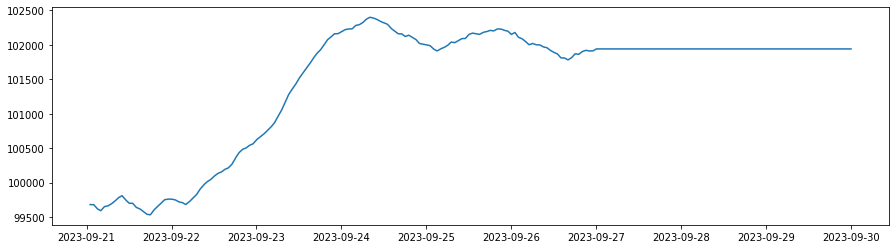

In [58]:
display(atm_data_interpolated.head(2))

fig, ax = plt.subplots(figsize=(15, 4))
ax.plot(atm_data_interpolated.index, atm_data_interpolated['P [Pa]'])

In [60]:
atm_data_interpolated.to_csv('atm_ps_data_interpolated.txt', index_label='Time')

In [66]:
x = datetime(2022, 1, 1)

print(x)
print(type(x))

atm_data_interpolated.index[0]

2022-01-01 00:00:00
<class 'datetime.datetime'>


Timestamp('2023-09-21 01:00:00', freq='125L')

In [68]:
data = pd.read_csv('atm_ps_data_interpolated.txt', parse_dates=['Time'])
display(data)

,Time,P [Pa]
0,2023-09-21 01:00:00.000,99680.0
1,2023-09-21 01:00:00.125,99680.0
2,2023-09-21 01:00:00.250,99680.0
3,2023-09-21 01:00:00.375,99680.0
4,2023-09-21 01:00:00.500,99680.0
...,...,...
6191996,2023-09-29 23:59:59.500,101940.0
6191997,2023-09-29 23:59:59.625,101940.0
6191998,2023-09-29 23:59:59.750,101940.0
6191999,2023-09-29 23:59:59.875,101940.0
